Quantidade de linhas: 100.00
Área pelo trapézio: 0.28
Área por 1/3: 0.29
Área por 3/8: 0.28


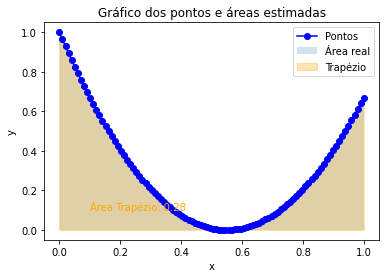

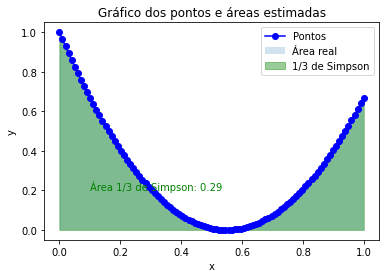

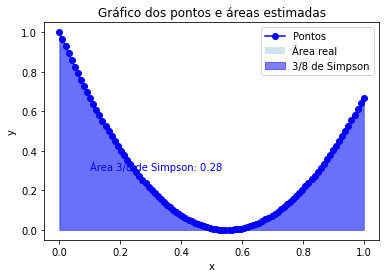

In [6]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# Função para trapézio
def trapezoidal_rule(x, y):
    n = len(x)
    area = 0.0
    
    for i in range(1, n):
        h = x[i] - x[i-1]
        area += h * (y[i] + y[i-1]) / 2.0
    
    return area

# Função para 1/3 de Simpson
def simpsons_one_third_rule(x, y):
    n = len(x) - 1
    h = (x[n] - x[0]) / n
    integral = y[0] + y[n]

    if n >= 2:
        if n % 2 == 0: # Número de intervalos par
            for i in range(1, n):
                if i % 2 == 0:
                    integral += 2 * y[i]
                else:
                    integral += 4 * y[i]

            integral *= h / 3
        else:
            for i in range(1, n):
                if i % 2 == 0:
                    integral += 2 * y[i]
                else:
                    integral += 4 * y[i]

            integral += 4 * y[n-1] + y[n]
            integral *= h / 3
            integral -= (h / 2) * y[n-1]  # Método do trapézio para o último intervalo
    else:
        integral = (x[n] - x[0]) * (y[0] + y[n]) / 2

    return integral

# Função para 3/8 de Simpson
def simpsons_three_eighth_rule(x, y):
    n = len(x) - 1
    h = (x[n] - x[0]) / n
    integral = y[0] + y[n]
    
    for i in range(1, n):
        if i % 3 == 0:
            integral += 2 * y[i]
        else:
            integral += 3 * y[i]
    
    integral *= 3 * h / 8
    return integral

# Função para ler o arquivo CSV e tratar os valores nulos
def read_csv(filename, norm=0):
    x_values = []
    y_values = []
    line_count = 0  # Variável para contar as linhas (excluindo o cabeçalho)

    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        header = next(csv_reader)  # Lê o cabeçalho do CSV
        
        for row in csv_reader:
            x = float(row[0]) if row[0] else None
            y = float(row[1]) if row[1] else None
            
            x_values.append(x)
            y_values.append(y)
            line_count += 1
    
    # Substitui os valores nulos pela média da coluna
    x_mean = np.mean([x for x in x_values if x is not None])
    y_mean = np.mean([y for y in y_values if y is not None])
    
    x_values = [x if x is not None else x_mean for x in x_values]
    y_values = [y if y is not None else y_mean for y in y_values]
    
    # Normaliza os valores entre 0 e 1, se norm for 1
    if norm == 1:
        x_min = min(x_values)
        x_max = max(x_values)
        y_min = min(y_values)
        y_max = max(y_values)
        
        x_values = [(x - x_min) / (x_max - x_min) for x in x_values]
        y_values = [(y - y_min) / (y_max - y_min) for y in y_values]
    
    return x_values, y_values, line_count

# Função para plotar o gráfico com os pontos, área real e áreas estimadas
def plot_graph_trap(x, y, trap_area):
    plt.plot(x, y, 'bo-', label='Pontos')
    plt.fill_between(x, y, alpha=0.2, label='Área real')
    
    if trap_area:
        plt.fill_between(x, y, alpha=0.3, color='orange', label='Trapézio')
        plt.text(0.1, 0.1, 'Área Trapézio: {:.2f}'.format(trap_area), color='orange')
    
    plt.title('Gráfico dos pontos e áreas estimadas')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
def plot_graph_13(x, y, simp13_area):
    plt.plot(x, y, 'bo-', label='Pontos')
    plt.fill_between(x, y, alpha=0.2, label='Área real')
    
    if simp13_area:
        plt.fill_between(x, y, alpha=0.4, color='green', label='1/3 de Simpson')
        plt.text(0.1, 0.2, 'Área 1/3 de Simpson: {:.2f}'.format(simp13_area), color='green')
        
    plt.title('Gráfico dos pontos e áreas estimadas')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
        
def plot_graph_38(x, y, simp38_area):
    plt.plot(x, y, 'bo-', label='Pontos')
    plt.fill_between(x, y, alpha=0.2, label='Área real')
    
    if simp38_area:
        plt.fill_between(x, y, alpha=0.5, color='blue', label='3/8 de Simpson')
        plt.text(0.1, 0.3, 'Área 3/8 de Simpson: {:.2f}'.format(simp38_area), color='blue')
    
    plt.title('Gráfico dos pontos e áreas estimadas')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Ler os valores x e y do CSV
x, y, qtd = read_csv('parabola.csv', norm=1)

# Calcular as áreas estimadas
area_trap = trapezoidal_rule(x, y)
area_simp13 = simpsons_one_third_rule(x, y)
area_simp38 = simpsons_three_eighth_rule(x, y)

print("Quantidade de linhas: {:.2f}".format(qtd))
print("Área pelo trapézio: {:.2f}".format(area_trap))
print("Área por 1/3: {:.2f}".format(area_simp13))
print("Área por 3/8: {:.2f}".format(area_simp38))

# Plotar o gráfico com os pontos e áreas estimadas
plot_graph_trap(x, y, area_trap)
plot_graph_13(x, y, area_simp13)
plot_graph_38(x, y, area_simp38)


In [35]:
len(x)

10